# Project Scenario

##  Business Analytics Sprint
### Project Goal: To optimize Yandex.Afisha marketing expenses
<b> key words:</b> LTV, CAC, ROMI, cohort analysis

<b> libraries used:</b> panda, seaborn


### Data we were provided : 
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

### You are going to study:
1. How people use the product
2. When they start to buy
3. How much money each customer brings
4. When they pay off


## Description of the data

#### The visits table (server logs with data on website visits):
* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.
#### The orders table (data on orders):
* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order

#### The costs table (data on marketing expenses):
* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day

## <font color='black'>Project Steps</font>

#### Step 1. Download the data and prepare it for analysis

* Store the data on visits, orders, and expenses in variables.

* Optimize the data for analysis. Make sure each column contains the correct data type.

#### Step 2. Make reports and calculate metrics:

##### Product

* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* How often do users come back?

##### Sales

1.When do people start buying? 

*  (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. 

- If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

2.How many orders do they make during a given period of time?

3.What is the average purchase size?

4.How much money do they bring? (LTV)

##### Marketing

* How much money was spent? Overall/per source/over time
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? (ROI)

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

#### Step 3. Write a conclusion: 
* Advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? 
* Back up your choice: what metrics did you focus on? Why? 
What conclusions did you draw after finding the metric values?


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st



# COSTS

In [77]:
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv', parse_dates=['dt']) 
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [78]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [79]:
costs.drop_duplicates()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


# ORDERS

In [81]:
#Orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])

#Orders = pd.read_csv(r'C:\Users\akantarevic\Downloads\orders_log_us.csv', parse_dates=['Buy Ts'])

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [82]:
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [83]:
orders['Revenue'].sum()

252057.19999999998

In [84]:
orders.drop_duplicates()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


# VISITS

In [86]:

visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv',  dtype={'Device':'category'}, parse_dates=['End Ts', 'Start Ts'])

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [87]:
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [88]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [89]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [90]:
visits.drop_duplicates()


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [92]:
visits

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_year,start_month,start_week,start_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,12,51,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2,8,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,5,20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,12,52,27
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017,7,30,29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018,1,4,25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018,3,9,3
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017,11,44,2


No null values

# Product

## Usage per day,week, & month

In [93]:
dau_total = visits.groupby('start_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['start_year', 'start_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['start_year', 'start_month']).agg({'Uid': 'nunique'}).mean()

print('Average Daily Usage:', int(dau_total))
print('Average Monthly Usage:', int(mau_total))
print('Average Weekly Usage:', int(wau_total))

Average Daily Usage: 907
Average Monthly Usage: 23228
Average Weekly Usage: 5716


## Sessions per day

In [96]:

dau_sessions_total = visits.groupby('start_date').agg({'Uid':'count'}).mean()

print('Average sessions daily:', int(dau_sessions_total))

Average sessions daily: 987


## Average length session

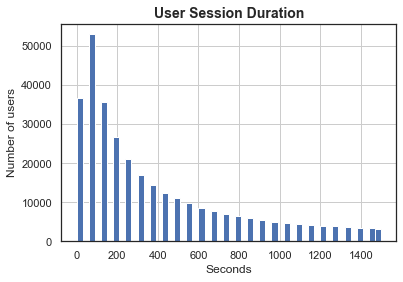

60     0.147549
0      0.099594
120    0.099466
180    0.074213
240    0.058667
300    0.047315
360    0.039833
420    0.034226
480    0.030531
540    0.027051
Name: session_duration_sec, dtype: float64


In [185]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits['session_duration_sec'].hist(bins=50, range=(0, 1500))
plt.title('User Session Duration', fontsize=14, weight='bold')
plt.xlabel('Seconds', fontsize=12)
plt.ylabel('Number of users', fontsize=12)
plt.show()


print(visits['session_duration_sec'].value_counts(normalize=True).head(10))

In [98]:
asl = visits['session_duration_sec'].mode()
print(asl)
print()
print('Average session duration is 1 minute')


0    60
dtype: int64

Average session duration is 1 minute


### <font color='black'>Comments</font>
Very short sessions could be accidental clicks or users not being engaged enough. It could also be that the product is super easy to use or understand so people don't spend much time on it.

## How often they come back?

In [99]:
print('Users return %')
print()
sticky_wau = dau_total/wau_total*100
print('Users who return(Weekly)', int(sticky_wau))
sticky_mau = dau_total/mau_total*100
print('Users who return(Monthly)', int(sticky_mau))


Users return %

Users who return(Weekly) 15
Users who return(Monthly) 3


### <font color='black'>Comments</font>
Users return more weekly, however 16% and 4% percent of returning users doesnt show much loyalty or its saying something else about the product

In [100]:
first_visit_date = visits.groupby('Uid')['start_date'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.merge(first_visit_date, on='Uid')

In [101]:
visits['first_visit_month']= visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month']= visits['start_date'].astype('datetime64[M]')


In [102]:
visits['visit_lifetime'] = (visits['visit_month'] -visits['first_visit_month'])/np.timedelta64(1,'M')
visits['visit_lifetime'] = visits['visit_lifetime'].round().astype(int)

In [103]:
cohorts= visits.groupby(['first_visit_month','visit_lifetime']).agg({'Uid':'nunique'}).reset_index()

initial_visit_count = cohorts[cohorts['visit_lifetime']==0][['first_visit_month','Uid']]
initial_visit_count = initial_visit_count.rename(columns={'Uid':'cohort_users'})

cohorts= cohorts.merge(initial_visit_count, on='first_visit_month')

cohorts['retention']= cohorts['Uid']/cohorts['cohort_users']
cohorts['months']=cohorts['first_visit_month'].dt.strftime('%Y-%m')

retention_pivot =cohorts.pivot_table(index='months', columns='visit_lifetime', values='retention', aggfunc='sum')


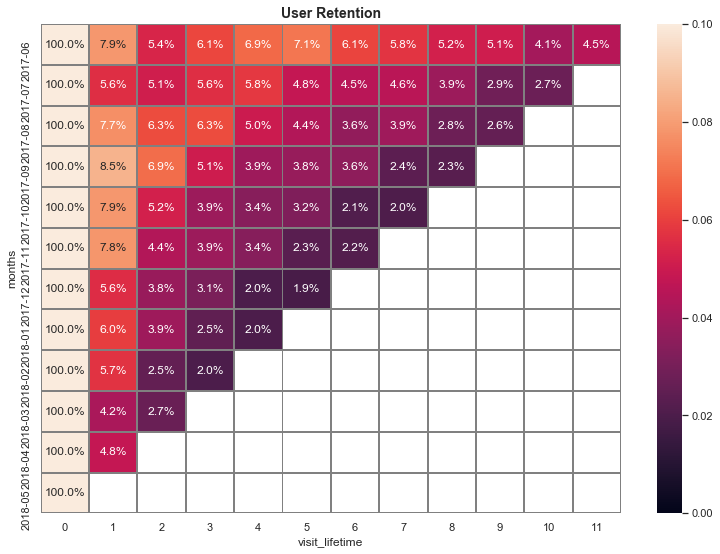

In [104]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('User Retention', fontsize=14, weight='bold')
sns.heatmap(retention_pivot, annot=True, fmt= '.1%', linewidth= 1, linecolor='gray', vmax= 0.1, vmin=0)


### <font color='black'>Comments</font>
Retention rate is very low throughout the cohort lifetimes. All but the 1st cohort show negative increases after a couple of cohort lifetimes. Don't think the spending is abornomal if theres no need to come back and repurchase. Maybe there could be an incentive and special to have the user come back more.


# Sales

In [105]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,start_date,start_year,start_month,start_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,visit_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,12,51,20,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2,8,19,1680,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26,1,0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,5,20,20,1440,2018-03-09,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018,3,10,9,1680,2018-03-09,2018-03-01,2018-03-01,0


## When do people start buying?


In [106]:
# merging orders dataframe to visits dataframe
visits_orders = orders.merge(visits, on='Uid', how = 'left')
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,start_date,start_year,start_month,start_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,visit_lifetime
409294,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6
409295,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0
409296,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5
2823,2017-06-03 17:39:00,1.83,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0
2824,2017-06-03 17:39:00,1.83,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0


761807


In [107]:
# finding first-orders datetime
first_orders = visits_orders.groupby('Uid')['Buy Ts'].min()
first_orders.name = 'first_order Ts'
visits_orders = visits_orders.merge(first_orders, on='Uid')
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,start_date,start_year,start_month,start_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,visit_lifetime,first_order Ts
646966,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5,2018-01-03 21:51:00
646965,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0,2018-01-03 21:51:00
646964,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6,2018-01-03 21:51:00
87229,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00
87230,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00


761807


In [108]:
# creating column for first-orders date
visits_orders['first_order_date'] = visits_orders['first_order Ts'].dt.date
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,start_date,start_year,start_month,start_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,visit_lifetime,first_order Ts,first_order_date
646966,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5,2018-01-03 21:51:00,2018-01-03
646965,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0,2018-01-03 21:51:00,2018-01-03
646964,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6,2018-01-03 21:51:00,2018-01-03
87229,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03
87230,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03


761807


In [109]:
# finding difference in days between first visits and first purchases
visits_orders['days_to_first_order'] = visits_orders['first_order_date'] - visits_orders['first_visit_date']
visits_orders['days_to_first_order'] = visits_orders['days_to_first_order'].astype('timedelta64[D]').astype(int)
display(visits_orders.sort_values(by='Uid').head())
print(len(visits_orders))

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,start_date,start_year,start_month,start_week,start_day,session_duration_sec,first_visit_date,first_visit_month,visit_month,visit_lifetime,first_order Ts,first_order_date,days_to_first_order
646966,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018,2,7,18,540,2017-09-18,2017-09-01,2018-02-01,5,2018-01-03 21:51:00,2018-01-03,107
646965,2018-01-03 21:51:00,0.55,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017,9,38,18,1080,2017-09-18,2017-09-01,2017-09-01,0,2018-01-03 21:51:00,2018-01-03,107
646964,2018-01-03 21:51:00,0.55,313578113262317,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018,3,10,11,360,2017-09-18,2017-09-01,2018-03-01,6,2018-01-03 21:51:00,2018-01-03,107
87229,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017,6,22,3,240,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03,0
87230,2017-06-03 10:13:00,1.22,1575281904278712,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017,6,22,3,720,2017-06-03,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,2017-06-03,0


761807


In [110]:
# days to first purchase
def days_until_first_order(days):
    """
    Labels users by number of days until first order.
    """
    if days == 0:
        return 'Same day'
    if days == 1:
        return '1 day'
    if days == 2:
        return '2 days'
    if days == 3:
        return '3 days'
    if days == 4:
        return '4 days'
    if days == 5:
        return '5 days'
    else:
        return 'More than five days'


visits_orders['days_to_order_group'] = visits_orders['days_to_first_order'].apply(days_until_first_order)

visits_orders_pivot = visits_orders.pivot_table(index=['Device', 'Source Id'], columns='days_to_order_group', values='Uid', aggfunc='nunique', fill_value=0)
display(visits_orders_pivot)

days_to_order_group  1 day  2 days  3 days  4 days  5 days  \
Device  Source Id                                            
desktop 1              465     159      86      77      61   
        2              357     130      99      86      64   
        3              662     257     149     143     118   
        4              610     239     153     153     109   
        5              423     145      98      95      70   
        7                0       0       0       0       0   
        9              118      44      28      26      22   
        10              84      36      16      17      15   
touch   1              169      65      42      31      32   
        2              149      55      37      38      30   
        3              191      72      51      41      36   
        4              236      96      62      61      53   
        5              134      52      31      36      13   
        7                0       0       0       0       0   
        9               29      22       8       8       8   
        10              30      21       4       4       5   

days_to_order_group  More than five days  Same day  
Device  Source Id                                   
desktop 1                           1698      2987  
        2                           2025      2898  
        3                           3140      7180  
        4                           3066      6823  
        5                           2096      5546  
        7                              0         1  
        9                            900      1120  
        10                           341       904  
touch   1                            593       846  
        2                            727       945  
        3                            919      1404  
        4                           1245      1901  
        5                            569      1042  
        7                              0         0  
        9                            266       292  
        10                           123       210

### <font color='black'>Comments</font>
Both desktop and touch users usually place their first order the same day they begin using the product. Many place their first order the next day. First purchases continue afterward, creating a very long tail – in fact, after same-day registration and purchase, most first purchases are placed only after a few days after registering. This might reflect a good number of professional users who first experiment with the product and then place a request internally (e.g. from their finance departments) to purchase the product. 

In general, desktop users place far more purchases than touch users. 

Most ad sources are drawing registration and purchases. Ad source 4 is the most effective between devices; 10 is the weakest; 7 fails almost completely. 

In [111]:
# creating first order month and order month series
visits_orders['first_order_month'] = visits_orders['first_order_date'].astype('datetime64[M]')
visits_orders['order_date'] = visits_orders['Buy Ts'].astype('datetime64[M]')
visits_orders['order_month'] = visits_orders['order_date'].astype('datetime64[M]')

In [112]:
# creating cohorts
visits_orders['cohort_lifetime'] = visits_orders['first_order_month'] - visits_orders['first_visit_month']

visits_orders['cohort_lifetime'] = visits_orders['cohort_lifetime']/np.timedelta64(1, 'M')

visits_orders['cohort_lifetime'] = visits_orders['cohort_lifetime'].round().astype('int')
visits_orders

,Buy Ts,Revenue,Uid,Device,End Ts,Source Id,Start Ts,start_date,start_year,start_month,...,visit_month,visit_lifetime,first_order Ts,first_order_date,days_to_first_order,days_to_order_group,first_order_month,order_date,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,2017,6,...,2017-06-01,0,2017-06-01 00:10:00,2017-06-01,0,Same day,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,2017,6,...,2017-06-01,0,2017-06-01 00:25:00,2017-06-01,0,Same day,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,2017,6,...,2017-06-01,0,2017-06-01 00:27:00,2017-06-01,0,Same day,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,2017,6,...,2017-06-01,0,2017-06-01 00:29:00,2017-06-01,0,Same day,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,2017,6,...,2017-06-01,0,2017-06-01 07:58:00,2017-06-01,0,Same day,2017-06-01,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,2018-01-15,2018,1,...,2018-01-01,3,2018-05-31 23:56:00,2018-05-31,220,More than five days,2018-05-01,2018-05-01,2018-05-01,7
761803,2018-05-31 23:56:00,3.67,3993697860786194247,desktop,2017-12-12 16:21:00,5,2017-12-12 16:20:00,2017-12-12,2017,12,...,2017-12-01,2,2018-05-31 23:56:00,2018-05-31,220,More than five days,2018-05-01,2018-05-01,2018-05-01,7
761804,2018-05-31 23:56:00,3.67,3993697860786194247,desktop,2017-10-23 12:36:00,3,2017-10-23 12:32:00,2017-10-23,2017,10,...,2017-10-01,0,2018-05-31 23:56:00,2018-05-31,220,More than five days,2018-05-01,2018-05-01,2018-05-01,7
761805,2018-05-31 23:56:00,3.67,3993697860786194247,desktop,2017-11-15 17:18:00,4,2017-11-15 17:08:00,2017-11-15,2017,11,...,2017-11-01,1,2018-05-31 23:56:00,2018-05-31,220,More than five days,2018-05-01,2018-05-01,2018-05-01,7


In [113]:
orders_cohorts = visits_orders.groupby(['first_visit_month', 'cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

orders_cohorts = orders_cohorts.merge(cohorts[["cohort_users", "first_visit_month"]], left_on="first_visit_month", right_on="first_visit_month")
orders_cohorts['conversion'] = orders_cohorts['Uid']/orders_cohorts['cohort_users']

In [114]:
# creating a heatmap for conversion rate
conversion_pivot = orders_cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='conversion', aggfunc='mean')
conversion_pivot


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,0.152576,0.012821,0.005053,0.008070,0.008975,0.006939,0.005883,0.004450,0.004827,0.004827,0.001961,0.004073
2017-07-01,0.133409,0.007230,0.007534,0.007610,0.006773,0.005860,0.005099,0.004718,0.003805,0.002511,0.002511,NaN
2017-08-01,0.118652,0.011590,0.009036,0.007170,0.006384,0.003732,0.003831,0.003732,0.002456,0.002456,NaN,NaN
2017-09-01,0.135117,0.016044,0.008561,0.006106,0.003532,0.004550,0.004250,0.002395,0.002514,NaN,NaN,NaN
2017-10-01,0.144782,0.012588,0.006852,0.004388,0.003734,0.003542,0.001886,0.002310,NaN,NaN,NaN,NaN
2017-11-01,0.123202,0.014386,0.005688,0.003743,0.004661,0.002349,0.002385,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.138159,0.009379,0.004551,0.004432,0.001781,0.002929,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.116867,0.010785,0.005039,0.002210,0.002961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.128486,0.009100,0.002793,0.003154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


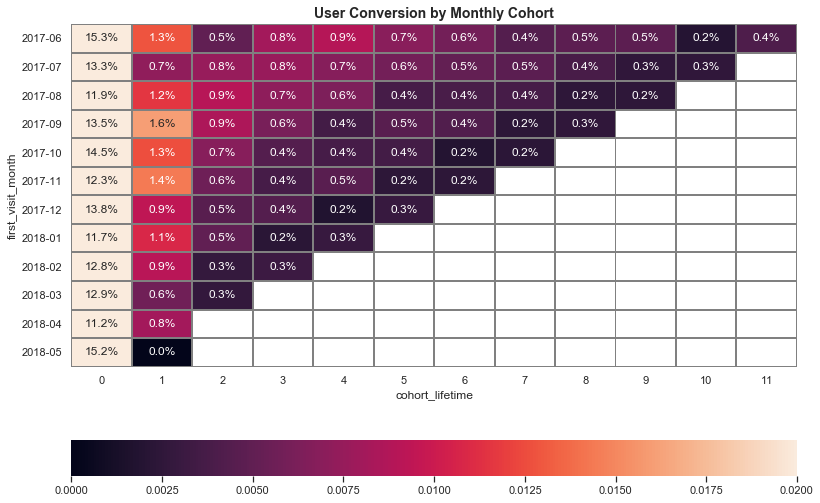

In [186]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Conversion by Monthly Cohort', fontsize=14, weight='bold')
sns.heatmap(conversion_pivot, annot=True, fmt='.1%',
            yticklabels = conversion_pivot.index.to_series().dt.strftime('%Y-%m'),
            linewidths='1', linecolor='gray',
            vmin=0, vmax=0.02,
             cbar_kws={"orientation": "horizontal"}
)
plt.show()

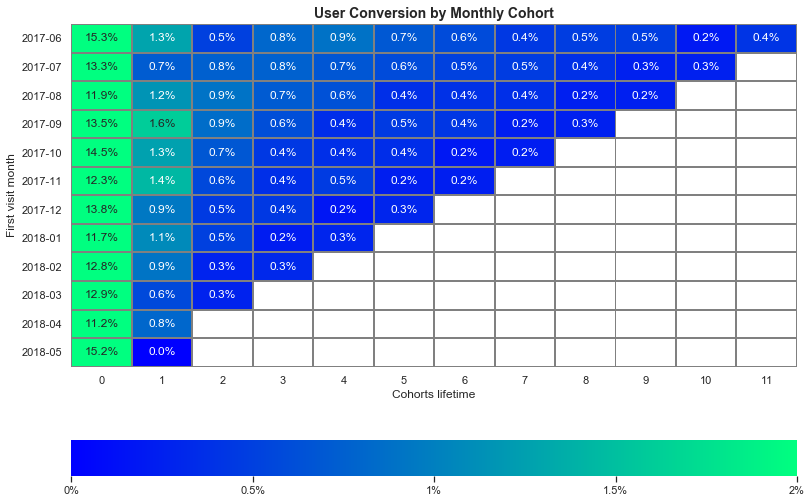

In [116]:
# Reviwer's code 

plt.figure(figsize=(13, 9))
plt.title('User Conversion by Monthly Cohort', fontsize=14, weight='bold')
ax = sns.heatmap(conversion_pivot, annot=True, fmt='.1%',
            yticklabels=conversion_pivot.index.to_series().dt.strftime('%Y-%m'),
            linecolor='gray', cmap='winter', linewidths='1', 
            vmin=0, vmax=0.02,
            cbar_kws={"orientation": "horizontal"})
ax.set_xlabel('Cohorts lifetime')
ax.set_ylabel('First visit month')

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.005 ,0.01, 0.015,  0.02])
cbar.set_ticklabels(['0%', '0.5%','1%', '1.5%', '2%'])

plt.show()

<div class="alert alert-info"> <b>Student comment:</b> 
Conversion is highest in each cohort in the 1st month of using the product and ranges anywhere from 11-15%. Some cohorts do convert in the following months but its a small %. 
</div>

## How many orders do they make during a given period of time?

In [117]:
#finding orders users placed each month
costs['month']=costs['dt'].astype('datetime64[M]')
orders['order_month']= orders['Buy Ts'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [118]:
# creating monthly cohorts and a heatmap
monthly_orders = visits_orders.groupby(['first_order_month', 'order_month']).agg({'Uid':'nunique'})
monthly_orders_by_cohorts = monthly_orders.pivot_table(index='first_order_month', columns='order_month', values='Uid', aggfunc='sum')
display(monthly_orders_by_cohorts)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


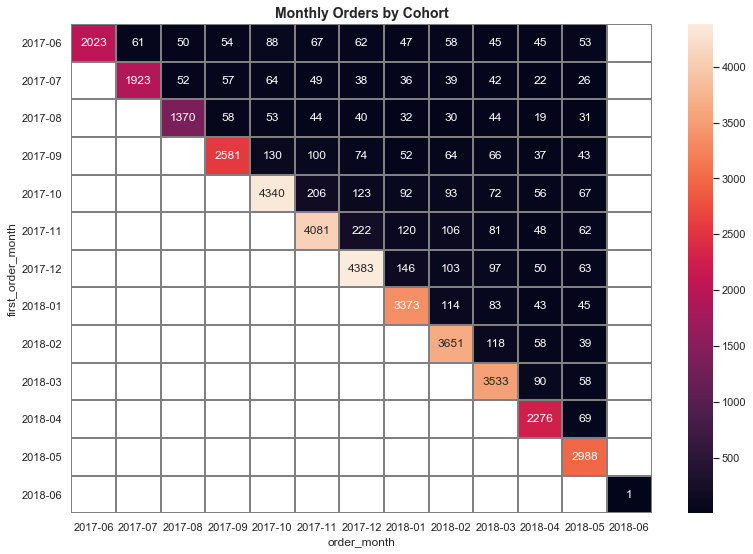

In [119]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Monthly Orders by Cohort', fontsize=14, weight='bold')
sns.heatmap(monthly_orders_by_cohorts, annot=True, fmt='g', linewidths='1', linecolor='gray',         
            xticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'),
            yticklabels = monthly_orders_by_cohorts.index.to_series().dt.strftime('%Y-%m'),)
plt.show()

### <font color='black'>Comments</font>
Users places orders mainly in their 1st month of using the prodcut. The amount of purchases decreases and then increases somewhat later on althought nowhere as much as the first month of use. There is a substantial increase in orders by new users between Oct 2017  and March 2018 compared to previous cohorts. It seems that marketing efforts paid off and the popularity grew around Septemeber of 2017.

## What is the average purchase size

### <font color='black'>Comments</font>
Average order size varies greatly per month and in time. There is little reason to why the increases and decreases happen however the average price is always larger in the second month as compared to the first. The order size increasing is a good sign and avg order sizes from there vary but there does show a slight dip between months 4 and 5. 

In [199]:
cohort_sizes=first_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.columns = ['cohort_month', 'n_buyers']
cohort_sizes.head(12)

,cohort_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [121]:
#new buyers
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_.head().sort_values(by=['Revenue'], ascending=False)

,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [122]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [201]:
cohorts1 = orders_.groupby('order_month').agg({'Revenue': 'sum'}).reset_index()
cohorts1.head(12)

,order_month,Revenue
0,2017-06-01,9557.49
1,2017-07-01,12539.47
2,2017-08-01,8758.78
3,2017-09-01,18345.51
4,2017-10-01,27987.70
5,2017-11-01,27069.93
6,2017-12-01,36388.60
7,2018-01-01,19417.13
8,2018-02-01,25560.54
9,2018-03-01,28834.59


In [123]:
print('How many orders do they make during a given period of time?')

first_purchase_dates = orders_.groupby('Uid')['Buy Ts'].min()
first_purchase_dates.name = 'first_purchase_datetime'

orders = orders_.merge(first_purchase_dates,on='Uid')

orders['purchase_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_purchase_month'] = orders['first_purchase_datetime'].astype('datetime64[M]')

orders_pivot = orders.pivot_table(index='first_purchase_month',columns='purchase_month',values='Revenue',aggfunc='sum')
display(orders_pivot)

How many orders do they make during a given period of time?


purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62,NaN
2017-07-01,NaN,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08-01,NaN,NaN,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN
2017-09-01,NaN,NaN,NaN,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN
2017-10-01,NaN,NaN,NaN,NaN,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,20767.49,1141.22,4054.70,4669.10,1371.57,1481.66,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13949.50,994.22,1026.34,481.59,211.48,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15177.16,1015.98,286.66,270.70,NaN


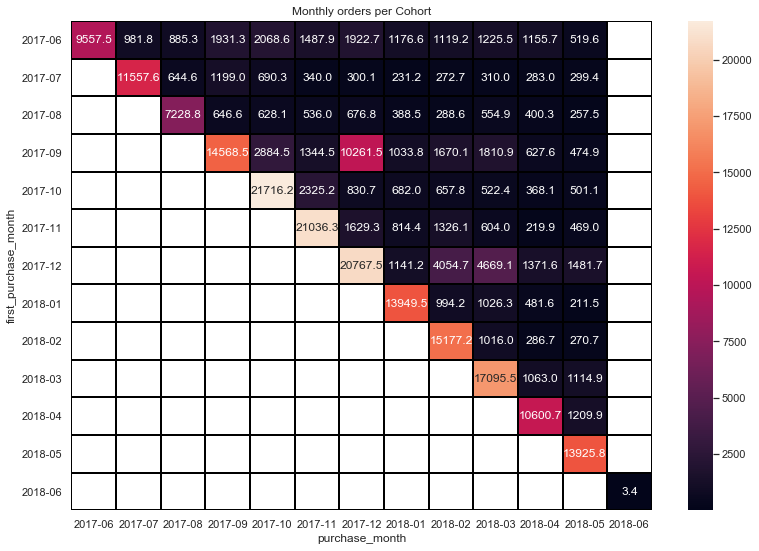

In [204]:
plt.figure(figsize=(13, 9))
plt.title('Monthly orders per Cohort')
sns.heatmap(orders_pivot, annot=True, fmt='.1f', xticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'), 
            yticklabels = monthly_orders_by_cohorts.index.to_series().dt.strftime('%Y-%m'), linewidths=1, linecolor='black')
plt.show()

In [206]:
#average purchase size
print('Average purchase size:', orders['Revenue'].mean())

Average purchase size: 4.999646930476922


### Conclusion: 
Average Order size Inconsistent showing second month average size increasing but then decreasings greatly. The cohort life time for june 17' has the highest counts of orders and it does show september and december have higher counts.



### <font color='black'>Newer Comments</font>
Conclusion: Shows that Oct- Dec has the most orders and that then it spikes around Spring again. There is a spike in the December for the 4 cohort.

## How much money do they bring? (LTV)

In [202]:
#(LTV)
cohort_sizes=first_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head(12).sort_values(by=['n_buyers'], ascending=False)

,first_order_month,n_buyers
6,2017-12-01,4383
4,2017-10-01,4340
5,2017-11-01,4081
8,2018-02-01,3651
9,2018-03-01,3533
7,2018-01-01,3373
11,2018-05-01,2988
3,2017-09-01,2581
10,2018-04-01,2276
0,2017-06-01,2023


In [135]:
#how much money do they bring(LTV)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

#how much money do they bring(LTV)
report['gp'] = report['Revenue'] 
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head().sort_values(by=['Revenue'], ascending=False)

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2


In [139]:
#LTV values
report['ltv']= report['gp'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


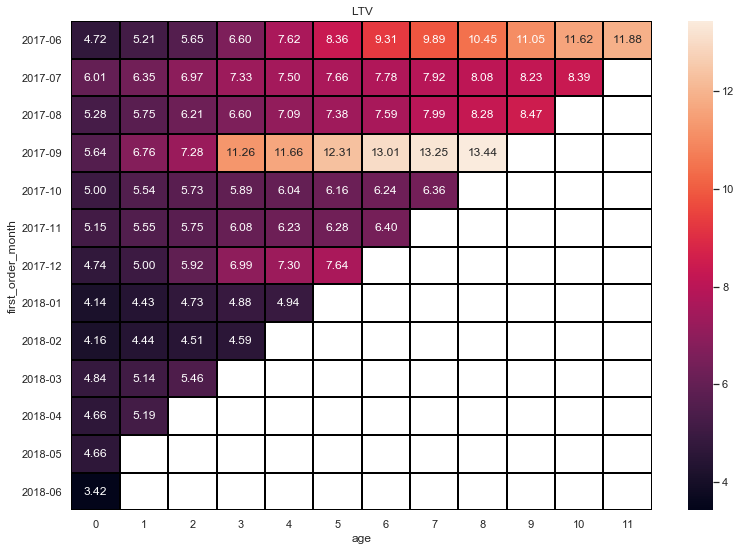

In [141]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2f', yticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'), linewidths=1, linecolor='black')
plt.show()

<div class="alert alert-info"> <b>Student's comment:</b> LTV only gets higher with time but some cohorts are muhc higher than others. The 1st and 4th cohort show the highest value. </div>


### <font color='black'>Comments</font>
Assuming 100% margin, a use in the 1st cohort generated an average of about $1,343 in Revenue after the 1st year. Cohorts following this have made much less and average revenue per user per month has gone down tremendously over time.<br>

There is an overall downward trend in revenue per user in new cohorts. However we do need to keep in mind that there was only 1 order that month compared to almost 3,000 orders in the prior cohort. (Monthly Orders by Cohort table, 2 tables above) <br> In any case Yandex needs to figure out a way to boost Revenues using whatever Marketing means it was using at the beginning of the period.


### <font color='black'>New Comments</font>
Based on data it shows that Avg Revenue per user has gone down. 


# Marketing

## How much money was spent? (Overall/per source/over time) 

In [142]:
print('Overall Yandex Marketing Total Spending:')
monthly_costs = costs.groupby('dt').sum()
print(monthly_costs['costs'].sum())


Overall Yandex Marketing Total Spending:
329131.62


In [143]:
#monthly_costs = costs.groupby(['dt', 'source_id']).sum()
#monthly_costs.head()

#monthly_costs = costs.groupby('source_id').sum()
#monthly_costs

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


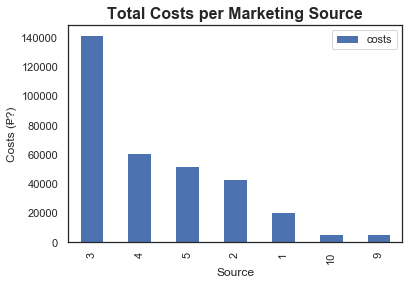

Yandex spent most on Source 3


In [165]:
# amount spent per source
costs_per_source = costs.groupby('source_id')['costs'].sum()
costs_per_source = costs_per_source.sort_values(ascending=False).reset_index()
display(costs_per_source)


costs_per_source.plot(x='source_id', kind='bar')
plt.title('Total Costs per Marketing Source', fontsize=16, weight='bold')
plt.ylabel('Costs (₽?)', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.show()

print('Yandex spent most on Source 3')

,month,month_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


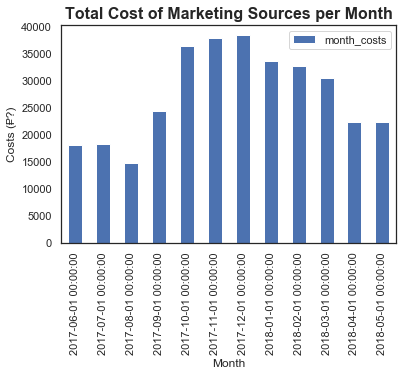

In [145]:
# amount spent over time
costs['cost_month'] = costs.dt.astype('datetime64[M]')
costs_per_month = costs.groupby('cost_month')['costs'].sum().reset_index()
costs_per_month.columns = ['month', 'month_costs']
display(costs_per_month)

costs_per_month.plot(x='month', kind='bar')
plt.title('Total Cost of Marketing Sources per Month', fontsize=16, weight='bold')
plt.ylabel('Costs (₽?)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [146]:
# determining cost per source over time
costs_source_monthly = costs.groupby(['cost_month', 'source_id'])['costs'].sum().round().astype('int').reset_index()
display(costs_source_monthly.head())

,cost_month,source_id,costs
0,2017-06-01,1,1126
1,2017-06-01,2,2427
2,2017-06-01,3,7732
3,2017-06-01,4,3515
4,2017-06-01,5,2616


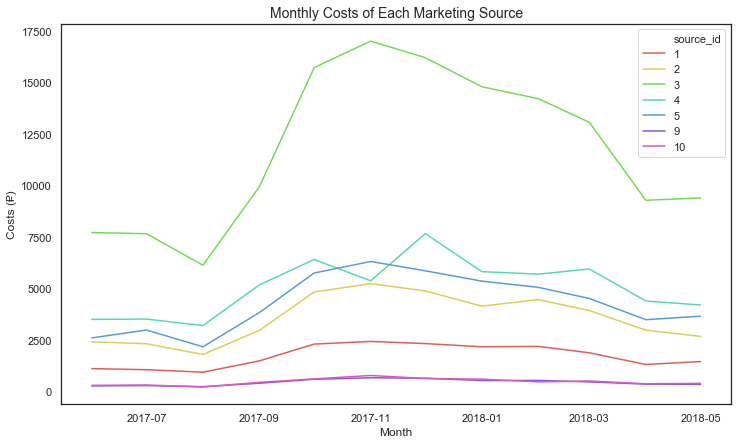

In [147]:
plt.figure(figsize=(12, 7))
pal = sns.color_palette("hls", 7)
sns.lineplot(data=costs_source_monthly, x='cost_month', y='costs', hue='source_id', palette=pal)
plt.title('Monthly Costs of Each Marketing Source', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Costs (₽)', fontsize=12)
plt.show()

### <font color='black'>Comments</font>
Yandex spent the least on marketing at the beginning of the time period and ramped it up after 3 months peaking during the 6th and 7th months and then started decreasing. The extra spending seems to have paid off since there was a huge increase in number of orders in Oct 2017. Yandex seems to test different marketing efforts over several months. 

## How much did customer acquisition from each of the sources cost? 

In [149]:
# customer acquisition from each source
visits_orders_sources = visits_orders.groupby('Source Id').agg({'Uid':'nunique', 'Revenue':'sum'}).round().reset_index()
visits_orders_sources.columns = ['source_id', 'n_buyers', 'revenue']

source_orders_costs = pd.merge(visits_orders_sources, costs_per_source, on='source_id')

source_orders_costs['cac'] = source_orders_costs['costs'] / source_orders_costs['n_buyers']

source_orders_costs.sort_values(by=['cac'], ascending=False)

,source_id,n_buyers,revenue,costs,cac
2,3,13846,296688.0,141321.63,10.206676
1,2,7305,2638189.0,42806.04,5.859828
4,5,10156,1181477.0,51757.10,5.096209
3,4,14253,496690.0,61073.60,4.284965
6,10,1773,14619.0,5822.49,3.283976
0,1,7138,2298200.0,20833.27,2.918642
5,9,2793,36342.0,5517.49,1.975471


In [182]:
print("Shows that source 2,5,4 and 1 all make lots in Revenue and have relatively low costs. Marketing Sources 3,4, and 5 have the highest CAC's." )

Shows that source 2,5,4 and 1 all make lots in Revenue and have relatively low costs. Marketing Sources 3,4, and 5 have the highest CAC's.


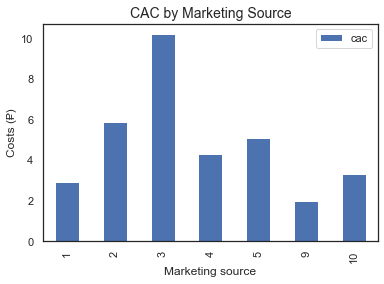

In [150]:
# plotting CAC per source
source_orders_costs.plot(kind='bar', x='source_id', y='cac')
plt.title('CAC by Marketing Source', fontsize=14)
plt.xlabel('Marketing source', fontsize=12)
plt.ylabel('Costs (₽)', fontsize=12)
plt.show()

### <font color='black'>Comments</font>
It doesn't cost Yandex much to acquire new customers. The most expensive CAC is (₽?)10.2 for source 3. This channel was by far the most expensive, onboarding a large number of customers. But its number of acquired customers was not the largest among the marketing sources. The largest – i.e. most successful – marketing source was source 4 – and this source cost less than half of what source 3 cost. Yandex should divert resources from source 3 to source 4.

## How worthwhile where the investments? (ROI)

In [159]:
# calculating ROMI
source_orders_costs['ltv'] = source_orders_costs['revenue'] / source_orders_costs['n_buyers']
source_orders_costs['romi'] = source_orders_costs['ltv'] / source_orders_costs['cac']

output_romi = source_orders_costs.pivot_table(index='source_id', values='romi', aggfunc='mean')
display(output_romi.sort_values(by='romi', ascending=False))
output_romi.mean(axis=0)

,romi
source_id,
1,110.313935
2,61.631232
5,22.827342
4,8.132647
9,6.586691
10,2.510781
3,2.099381


romi    30.586001
dtype: float64

#### Shows no return on investment for sources 6 and 7 and then very little return on sources 4,9,10 and 3

### <font color='black'>Comments</font>
All marketing sources are paying off. But source 1 is by far the most sucessful in terms of ROMI. Source 2 is also successful. These two sources lead in ROMI by a wide margin.

In [170]:
# rebuilding cohorts to include marketing cost per month
month_cost = costs.groupby('cost_month').agg({'costs':'sum'})
display(month_cost.head(12))

print('The highest costs belong to the months starting in Oct til March.')
full_report = report.merge(month_cost, left_on='first_order_month', right_on='cost_month')
display(full_report.head(10))

,costs
cost_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


The highest costs belong to the months starting in Oct til March.


,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0
5,2017-06-01,2023,2017-11-01,1487.92,1487.92,5,0.735502,18015.0
6,2017-06-01,2023,2017-12-01,1922.74,1922.74,6,0.950440,18015.0
7,2017-06-01,2023,2018-01-01,1176.56,1176.56,7,0.581592,18015.0
8,2017-06-01,2023,2018-02-01,1119.15,1119.15,8,0.553213,18015.0
9,2017-06-01,2023,2018-03-01,1225.51,1225.51,9,0.605788,18015.0


In [195]:
# calculating cac and romi per month
full_report['cac'] = full_report['costs'] / full_report['n_buyers']
full_report['romi'] = full_report['ltv'] / full_report['cac']
display(full_report.head())

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091,0.114825


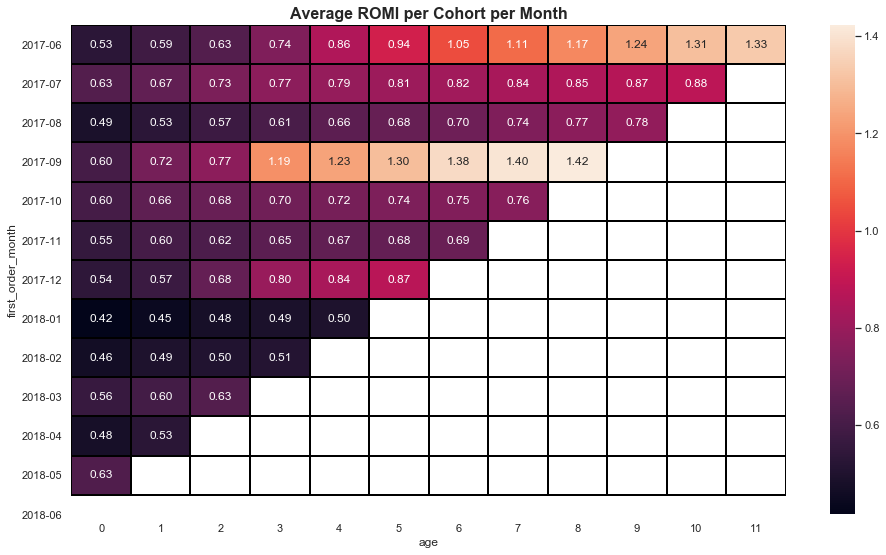

In [198]:
# creating table and heatmap
full_report_pivot = full_report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

plt.figure(figsize=(16, 9))
plt.title('Average ROMI per Cohort per Month', fontsize=16, weight='bold')
sns.heatmap(full_report_pivot.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='black', yticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'))
plt.show()

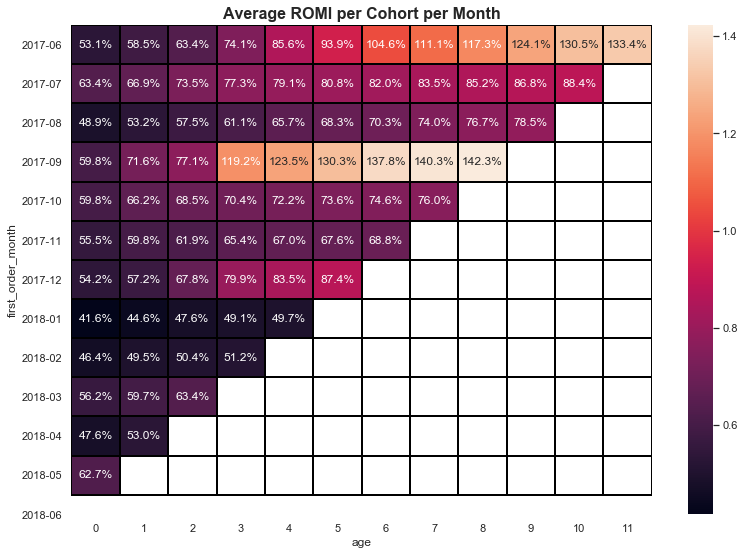

In [197]:
# creating table and heatmap
full_report_pivot = full_report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

plt.figure(figsize=(13, 9))
plt.title('Average ROMI per Cohort per Month', fontsize=16, weight='bold')
sns.heatmap(full_report_pivot.cumsum(axis=1), annot=True, fmt='.1%', linewidths=1, linecolor='black', yticklabels = monthly_orders_by_cohorts.columns.to_series().dt.strftime('%Y-%m'))
plt.show()

### <font color='black'>Comments</font>
The first and 4th cohort led all other cohorts in terms of ROMI. 


# Conclusion:

#### Advise marketing experts how much money to invest and where.
#### What sources/platforms would you recommend? Back up your choice: 
#### what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

* Very few users return to the product on a weekly or monthly basis so focusing on making users come back more often by including additional features or services could help.
<BR>
    
* Touch based visits are less popular and therefor Yandex should consider devoting resources to improving the experience since lots of people use their phones/apps now a days and everyone has a smart phone.
<BR>
    
* Yandex should look at dropping sources 7 and 10 as they are most ineffective. 
It would be wise to reduce investment through source 3 and start investing more in source 4 and 5. 
<BR>
    
* ROMI IS best on Sources 1,5 and 2 with 1 being the Lowest in CAC and second highest in Revenue. 
<BR>    
    
* Yandex should revisit its strategy in use around Sept 2017 as there was a big increase in orders.
<BR>
    
* Yandex may want to consider giving incentives more often to onboard more customers, which will increase sales in future months. It seems as though it has some large clients based on AVG monthly reventues and it wouldn't be a bad idea to have a special kind of deal for these clients to lead to more purchaes and easier budgeting decisions. 